<a href="https://colab.research.google.com/github/Charlene393/MachineLearning-basics/blob/main/Support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
The line with the high margin is better
Support vector machine draws a hyper plane in n dimensional space such that it maximizes margin between classification groups
Gamma and regularization
High Gamma give you a high accuracy than a low gamma
c means regularization when the dimensions are complex you xan do z= x^2 + y^2
the 'z' is called a kernel
'''

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
#creating a dataframe

df = pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df[df.target == 2]. head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [8]:
df['flower_name'] = df.target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [16]:
from matplotlib import pyplot as plt

In [11]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [12]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [14]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


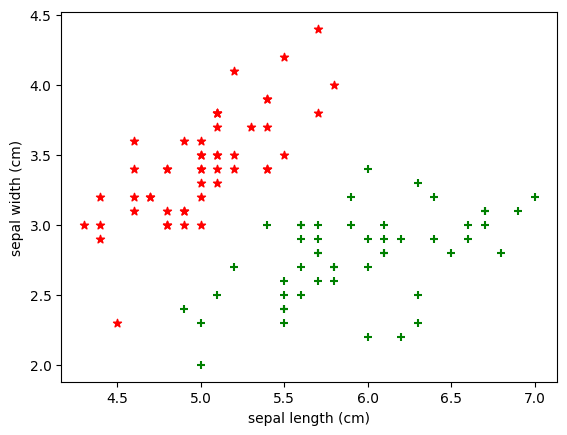

In [21]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'red', marker = '*' )
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'green', marker = '+' )

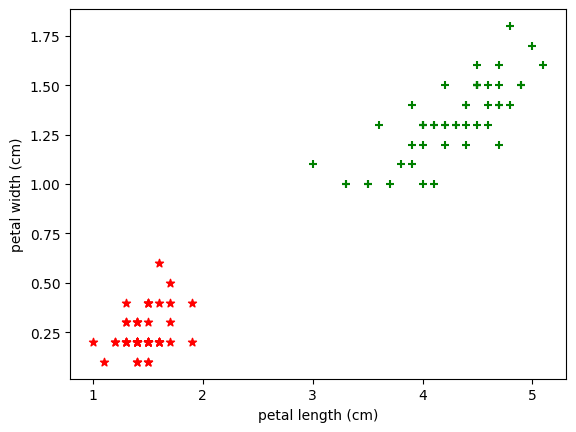

In [22]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'red', marker = '*' )
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'green', marker = '+' )

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
x = df.drop(['target', 'flower_name'], axis = 1)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
y = df.target
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [27]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2)

In [28]:
len(x_train)

120

In [29]:
len(x_test)

30

In [30]:
from sklearn.svm import SVC

In [37]:
#Increasing the regulirization increases the accuracy of the model this is achieved by C =10. Increasing the gamma reduces the accuracy of the model. This can be achieved by gamma=100 command. You can also use kernel to shift the accuracy kernel ='linear'. Kernel can be either 'kernel or rbf
odel = SVC(C=10)

In [39]:
model.fit(x_train, y_train)

SVC(C=10)

In [33]:
model.predict(x_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 0, 0])

In [40]:
model.score(x_test, y_test)

0.9333333333333333